# Evaluating regional wind/wave conditions

Here we will explore how to use a windrose to examine wind and wave climate.

We will use wind and wave observations from NDBC, as we have in prior labs.

Units are here: https://www.ndbc.noaa.gov/measdes.shtml




In [12]:
# Let's import our standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# Let's use pip to install this NDBC package
!pip install NDBC
from NDBC.NDBC import DataBuoy

# Let's install a package to make a windrose
!pip install windrose
from windrose import WindroseAxes

In [13]:
# Recall from our previous notebook we explored how to load NDCB data and remove outliers 
# Below we write a function to do all of this for us
ndbc_id = '46088'
DB = DataBuoy()
DB.set_station_id(ndbc_id) # Hein Bank 
DB.get_station_metadata()
DB.station_info
DB.get_stdmet(years=[2011],months=[1,2,3,4,5,6,7,8,9,10,11,12],datetime_index=True)

Jan not available.
Feb not available.
Mar not available.
Apr not available.
May not available.
Jun not available.
Jul not available.
Aug not available.
Sep not available.
Oct not available.
Nov not available.
Dec not available.



In [0]:
# Following the NDBC instructions to grab buoy data from 46088
# Note, if you change our station id you could look at other NDBC buoys
def get_ndbc(ndbc_id,yrs):
  DB = DataBuoy()
  DB.set_station_id(ndbc_id) # Hein Bank 
  DB.get_station_metadata()
  DB.station_info
  DB.get_stdmet(years=yrs,months=[1,2,3,4,5,6,7,8,9,10,11,12],datetime_index=True)
  df = DB.data['stdmet']['data']
  df = df.astype(float) # This was critical to do, otherwise we got the error "no numeric data to plot"
  z_scores = scipy.stats.zscore(df['PRES']) 
  varlist = ['WDIR','WSPD','GST','WVHT','DPD','APD','MWD','PRES','ATMP','WTMP']
  for myvar in varlist:
    z_scores = scipy.stats.zscore(df[myvar])
    abs_z_scores = np.abs(z_scores)
    bad_values = (abs_z_scores > 4)
    df[myvar][bad_values] = np.nan  
  bad_wave = df['WVHT'] > 50
  df['WVHT'][bad_wave] = np.nan
  df['MWD'][bad_wave] = np.nan
  df['APD'][bad_wave] = np.nan
      
  return df    


In [15]:
# Grab some data from Hein Bank
noaa_id = '46088'
years = ['2011','2012']
df = get_ndbc(noaa_id,years)

Jan not available.
Feb not available.
Mar not available.
Apr not available.
May not available.
Jun not available.
Jul not available.
Aug not available.
Sep not available.
Oct not available.
Nov not available.
Dec not available.



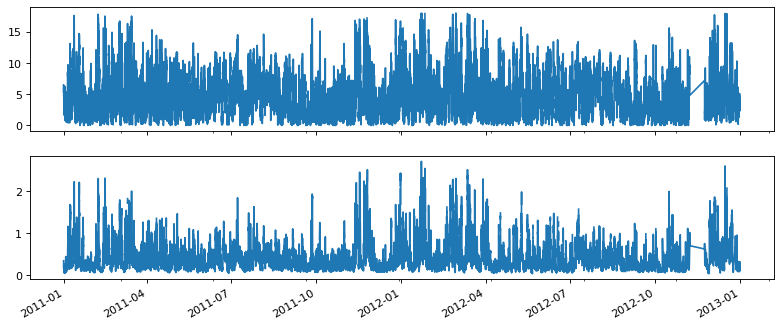

In [16]:
# Check to make sure we have some data
f = plt.figure(num=None, figsize=(12,5), dpi=80)
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
df['WSPD'].plot()
plt.sca(ax2)
df['WVHT'].plot()

Now that we have some data, let's try using this windrose package.

A tutorial can be found here, https://windrose.readthedocs.io/en/latest/usage.html

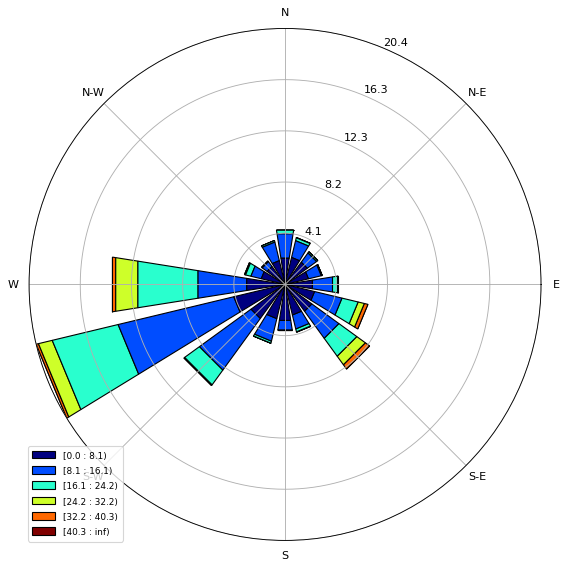

In [17]:
# Generate a windrose. use mph instead of m/s
ms2mph = 2.23694;
ax = WindroseAxes.from_ax()
ax.bar(df['WDIR'], df['WSPD']*ms2mph, normed=True, opening=0.8, edgecolor='black')
ax.set_legend()

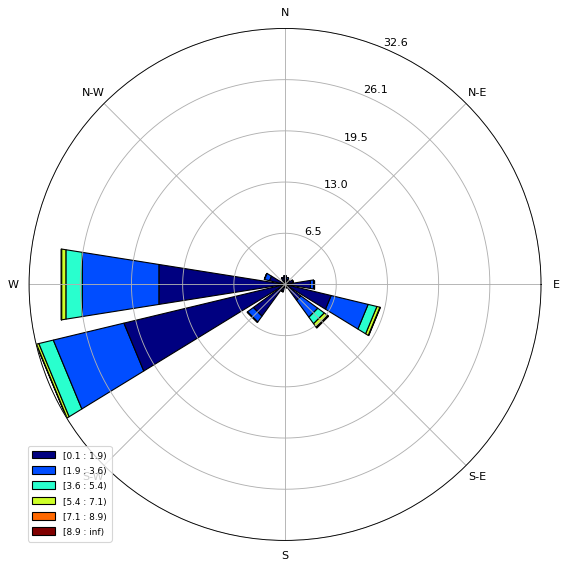

In [18]:
# Simiarly we can apply to wave heights and directions
m2ft = 3.28084;
ax = WindroseAxes.from_ax()
ax.bar(df['MWD'], df['WVHT']*m2ft, normed=True, opening=0.8, edgecolor='black')
ax.set_legend()

### Let's look at Neah Bay now

In [19]:
# Neah Bay
noaa_id = '46087'
years = ['2020']#['2009','2010','2011','2012','2013']
df_neah = get_ndbc(noaa_id,years)

Year 2020 not available.
May not available.
Jun not available.
Jul not available.
Aug not available.
Sep not available.
Oct not available.
Nov not available.
Dec not available.



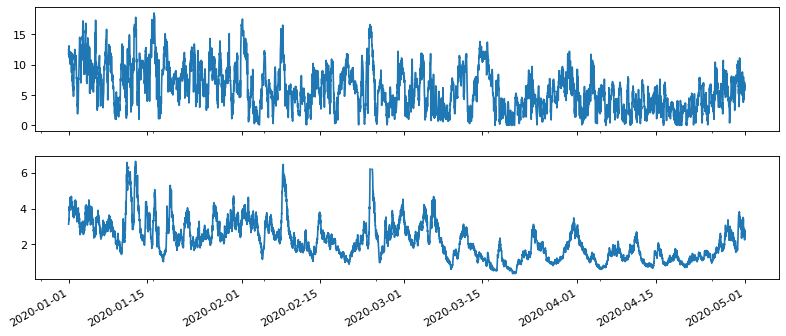

In [20]:
# Check to make sure we have some data
f = plt.figure(num=None, figsize=(12,5), dpi=80)
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
df_neah['WSPD'].plot()
plt.sca(ax2)
df_neah['WVHT'].plot()

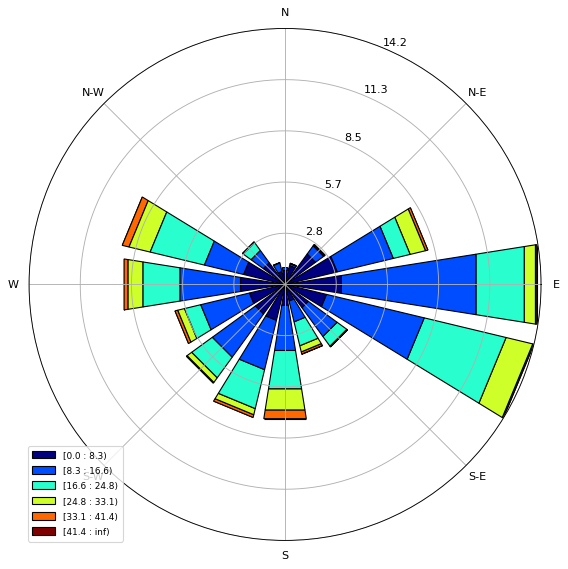

In [21]:
ax = WindroseAxes.from_ax()
ax.bar(df_neah['WDIR'], df_neah['WSPD']*ms2mph, normed=True, opening=0.8, edgecolor='black')
ax.set_legend()

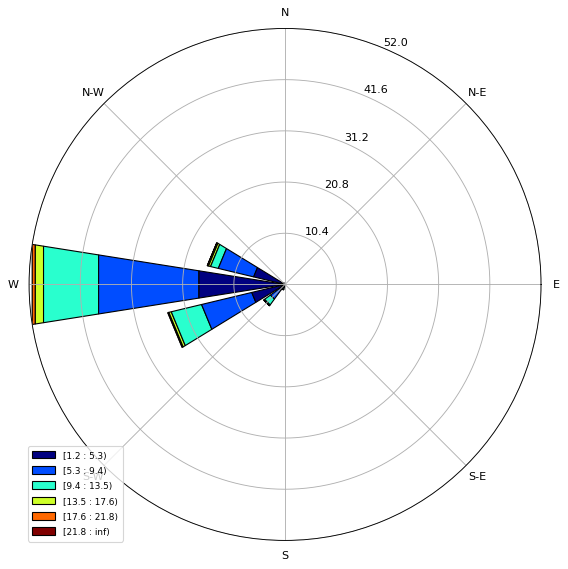

In [22]:
ax = WindroseAxes.from_ax()
ax.bar(df_neah['MWD'], df_neah['WVHT']*m2ft, normed=True, opening=0.8, edgecolor='black')
ax.set_legend()